In [1]:
import argparse 
import os
import torch
import torchaudio
import numpy as np
from wav2vec2_vib_gelu import Model
# from wav2vec2_linear_nll import Model
from torchinfo import summary
import librosa
from audio_cam import AudioGradCAM, visualize_cam

In [2]:
# device = "cpu"
# device = "cuda" if torch.cuda.is_available
# () else "cpu"
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
model = Model(
    device=device
).to(device)
# 가중치 로드 시 에러 핸들링 추가
try:
    # model.load_state_dict(torch.load('vib_conf-5_gelu_2s_may27_epoch6.pth', map_location=device))
    model.load_state_dict(torch.load('/datad/pretrained/AudioDeepfakeCMs/vib/vib_conf-5_gelu_acmccs_apr3_moreko_telephone_epoch22.pth', map_location=device))
    # model.load_state_dict(torch.load('/home/woonj/grad-cam/conf-3-linear.pth', map_location=device))
    print("Model weights loaded successfully!")
except FileNotFoundError:
    print("Model weights file not found. Please check the file path.")
except Exception as e:
    print(f"Error loading model weights: {e}")

/home/woonj/anaconda3/envs/grad_cam/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Model weights loaded successfully!


In [3]:
# 오디오 로드
# audio_path = "/home/woonj/grad-cam/2조인성_real.wav"
# audio_path = "/home/woonj/grad-cam/2조인성_real (mp3cut.net).wav"
# audio_path = "/home/woonj/grad-cam/1조인성_수상소감.wav"
# audio_path = "/home/woonj/LIME_audio/audio_sample/송혜교_수상소감.mp3"
# audio_path = "/home/woonj/analyze_missclassification/cnsl_real_fake_audio/2-DSD-corpus/Synthesizers/inthewild_spoof/416.wav"
# audio_path = "/home/woonj/analyze_missclassification/analyze_music/output_music/temp_Park_ShinYang_4_alpha_0.4.wav"
# audio_path = "/home/woonj/analyze_missclassification/analyze_music/real_sample/Park_ShinYang_4.wav"
# audio_path = "/home/woonj/grad-cam/CON_E_0026078.wav"
# audio_path = "/home/woonj/analyze_missclassification/cnsl_real_fake_audio/2-DSD-corpus/Real/inthewild_bona/1102.wav"
# audio_path = "/home/woonj/analyze_missclassification/cnsl_real_fake_audio/inthewild_bona/449.wav"
# audio_path = "/home/woonj/analyze_missclassification/cnsl_real_fake_audio/inthewild_spoof/159.wav"
# audio_path = "/AISRC2/Dataset/cnsl_real_fake_audio/ASVspoof2019_LA_eval/LA_E_1837629.flac"
audio_path = "/home/woonj/grad-cam/ps/PartialSpoof/database/eval/con_wav/CON_E_0033629.wav"
# 필요한 경우 샘플링 레이트 설정 (None으로 기본 샘플링 레이트 사용)
waveform, sr = librosa.load(audio_path, sr=16000)  # librosa를 사용한다면 이렇게 가능
# waveform = torch.randn(64000)
waveform =  torch.Tensor(waveform)
waveform = waveform.unsqueeze(0)
waveform.shape

torch.Size([1, 36163])

In [4]:
# gradient_layers = model.backend.m_utt_level
# target_layer = model.ssl_model.model.feature_extractor.conv_layers[-1][0]
# target_layer = model.ssl_model.model.encoder.layers[23].self_attn.out_proj
# target_layer = model.backend.m_frame_level[6]
target_layer = model.LL

Input tensor shape: torch.Size([1, 1, 36163])
Input tensor shape: torch.Size([1, 512, 7231])
Input tensor shape: torch.Size([1, 512, 3615])
Input tensor shape: torch.Size([1, 512, 1807])
Input tensor shape: torch.Size([1, 512, 903])
Input tensor shape: torch.Size([1, 512, 451])
Input tensor shape: torch.Size([1, 512, 225])
Input tensor shape: torch.Size([1, 1024, 112])


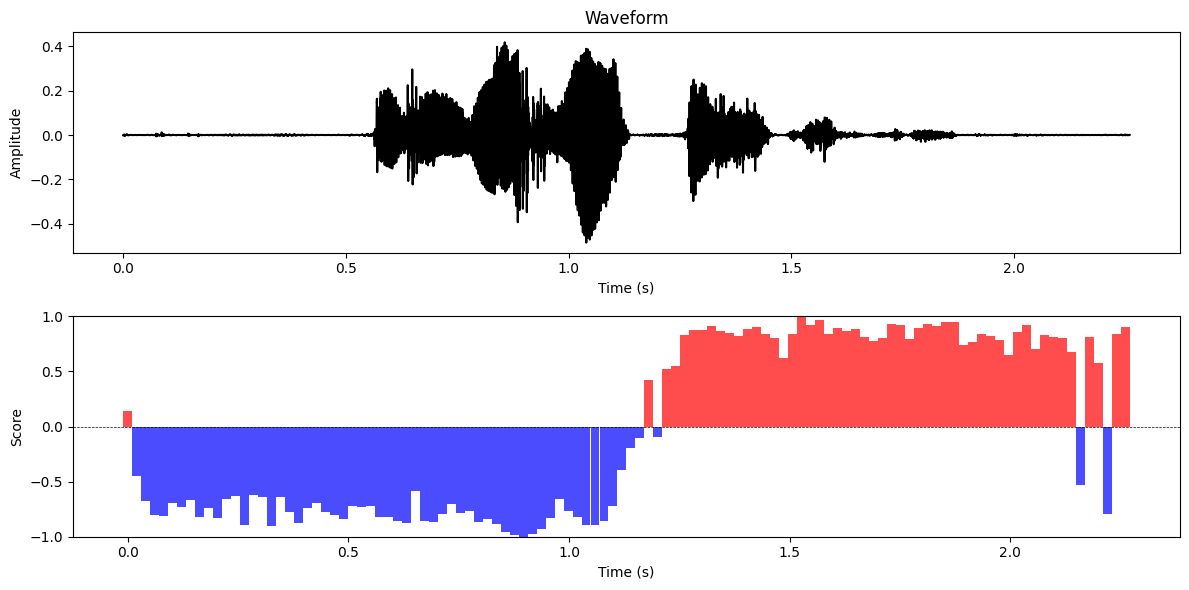

In [5]:
# AudioGradCAM 사용
grad_cam = AudioGradCAM(model=model, target_layers=[target_layer])
# cam = grad_cam(waveform)
cam = grad_cam(waveform)

In [6]:
cam.squeeze().squeeze()

array([ 0.0016933 , -0.00559354, -0.00840472, -0.00993589, -0.01005367,
       -0.00864767, -0.00908046, -0.0082405 , -0.0102447 , -0.00917131,
       -0.01030704, -0.00819884, -0.00783416, -0.01111776, -0.00772883,
       -0.00797257, -0.01119074, -0.0079076 , -0.00964069, -0.01092487,
       -0.00915185, -0.00864341, -0.00959133, -0.00995042, -0.01044915,
       -0.00895904, -0.00912222, -0.00892097, -0.01020583, -0.01019151,
       -0.01070896, -0.01086529, -0.00723999, -0.01060231, -0.01081065,
       -0.00984905, -0.0086966 , -0.00972295, -0.00948694, -0.01075643,
       -0.01048071, -0.01093732, -0.01185105, -0.01228449, -0.01242803,
       -0.0121723 , -0.01157196, -0.01033818, -0.00812116, -0.00956509,
       -0.01020729, -0.01112841, -0.01112433, -0.01063948, -0.00896219,
       -0.0048955 , -0.0024205 , -0.00123588,  0.00511029, -0.00122415,
        0.00628761,  0.00668132,  0.01005949,  0.01060309,  0.01065117,
        0.01106547,  0.0104645 ,  0.01024723,  0.0099866 ,  0.01

: 

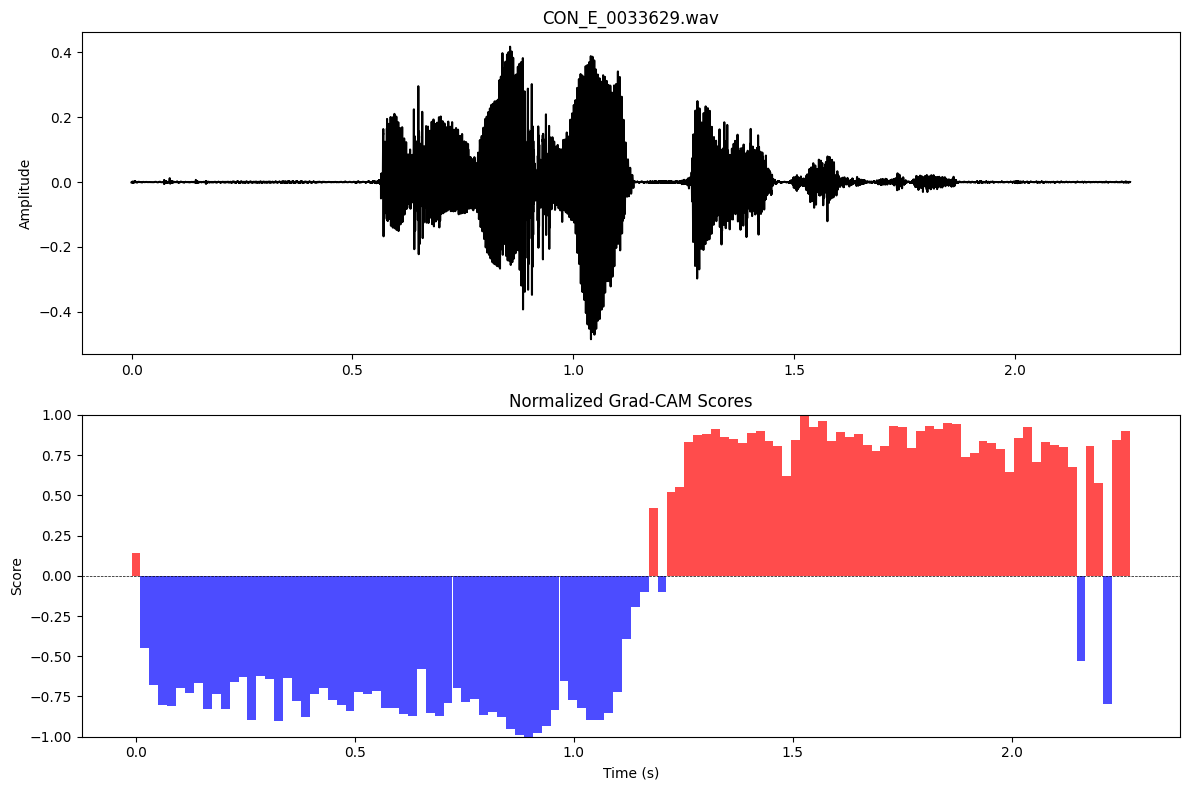

In [7]:
visualize_cam(cam, audio_path)

In [21]:
import glob
file_path = "/home/woonj/grad-cam/ps/PartialSpoof/database/segment_labels/eval_seglab_0.16.npy"
# .npy 파일 불러오기
data = np.load(file_path, allow_pickle=True)
# 데이터의 첫 몇 개 항목 출력 (예: 처음 5개)
# 검색 결과를 저장할 리스트

# 검색할 키와 값
search_key = 'CON_E_0033629'
search_value = '1'

# 결과를 저장할 리스트
results = []

# 특정 키에 대한 배열 가져오기
if search_key in data:
    values = data[search_key]  # 특정 키의 값을 가져옴
    for index, value in enumerate(values):  # 배열 내에서 인덱스와 값으로 반복
        if value == search_value:  # 조건 확인
            results.append((search_key, index, value))  # 결과에 키, 인덱스, 값을 추가

# 결과 출력
print(results)

[]
